In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import folium
from folium.plugins import HeatMap

data = pd.read_csv('/content/US_Accidents_Dec21_updated.csv')


print(data.info())
print(data.head())
print(data.columns)

<ipython-input-2-c5e4c665d74e>:8: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/US_Accidents_Dec21_updated.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85267 entries, 0 to 85266
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     85267 non-null  object 
 1   Severity               85267 non-null  int64  
 2   Start_Time             85267 non-null  object 
 3   End_Time               85267 non-null  object 
 4   Start_Lat              85267 non-null  float64
 5   Start_Lng              85267 non-null  float64
 6   End_Lat                85267 non-null  float64
 7   End_Lng                85267 non-null  float64
 8   Distance(mi)           85266 non-null  float64
 9   Description            85266 non-null  object 
 10  Number                 17692 non-null  float64
 11  Street                 85266 non-null  object 
 12  Side                   85266 non-null  object 
 13  City                   85253 non-null  object 
 14  County                 85266 non-null  object 
 15  St

In [3]:

try:
    data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')  # Use 'coerce' to handle invalid values
    data['hour'] = data['Start_Time'].dt.hour


    invalid_rows = data[data['Start_Time'].isnull()]
    if not invalid_rows.empty:
        print("Rows with invalid Start_Time values:")
        print(invalid_rows)


    data = data.dropna(subset=['Start_Time'])
    print("Preprocessing complete. Sample data:")
    print(data[['Start_Time', 'hour']].head())

except Exception as e:
    print(f"Error during preprocessing: {e}")


Preprocessing complete. Sample data:
           Start_Time  hour
0 2016-02-08 00:37:08     0
1 2016-02-08 05:56:20     5
2 2016-02-08 06:15:39     6
3 2016-02-08 06:51:45     6
4 2016-02-08 07:53:43     7


<ipython-input-4-c74a9d28f27e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')


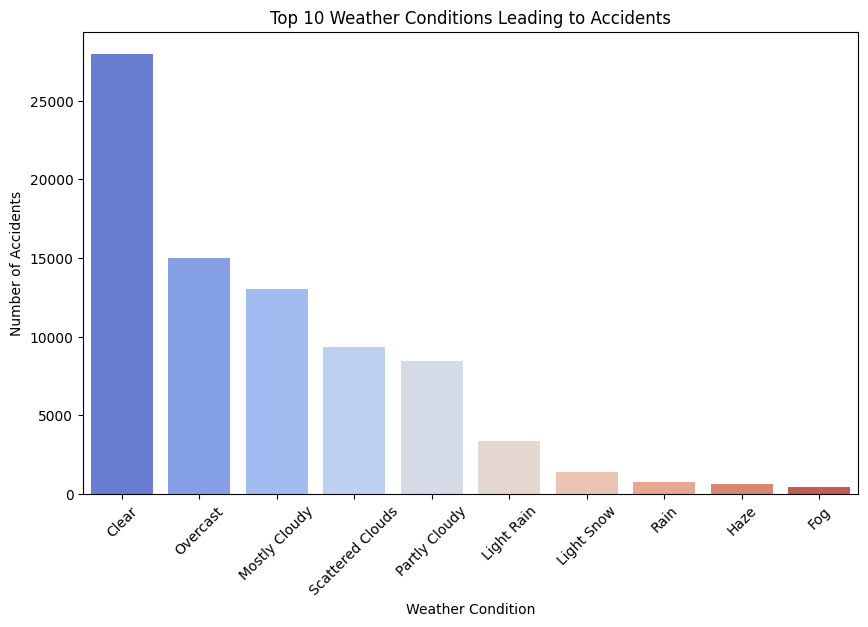

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


weather_counts = data['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')
plt.title('Top 10 Weather Conditions Leading to Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


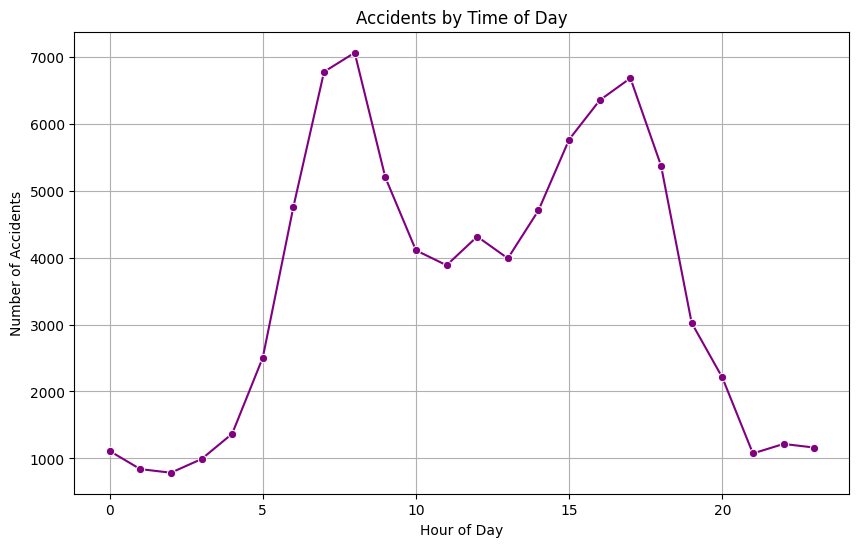

In [5]:

hourly_accidents = data['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values, marker='o', color='purple')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


In [6]:
import folium
from folium.plugins import HeatMap


data = data.dropna(subset=['Start_Lat', 'Start_Lng'])


map_center = [data['Start_Lat'].mean(), data['Start_Lng'].mean()]
traffic_map = folium.Map(location=map_center, zoom_start=10)


heat_data = data[['Start_Lat', 'Start_Lng']].values.tolist()
HeatMap(heat_data).add_to(traffic_map)


traffic_map.save("accident_hotspots.html")
print("Accident hotspots map saved as 'accident_hotspots.html'")


Accident hotspots map saved as 'accident_hotspots.html'


<ipython-input-7-8e6d16acf1b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_by_hour.index, y=severity_by_hour.values, palette='viridis')


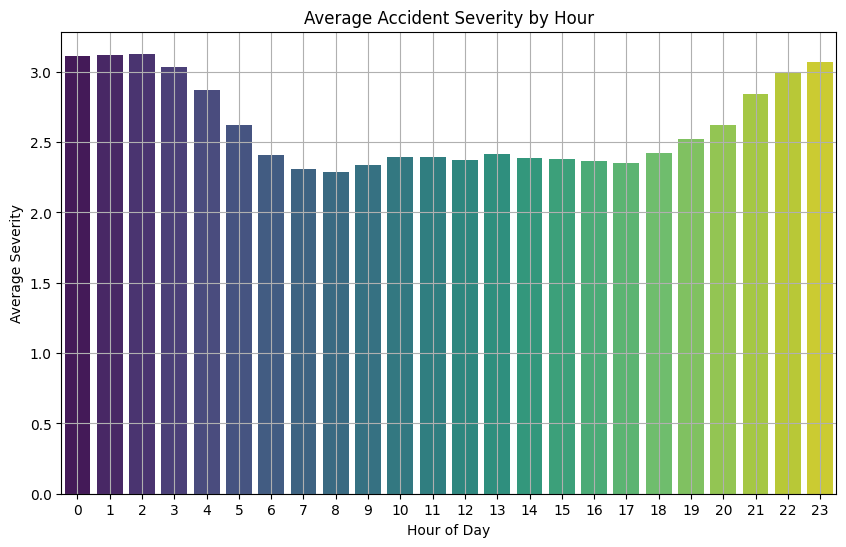

In [7]:

severity_by_hour = data.groupby('hour')['Severity'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_by_hour.index, y=severity_by_hour.values, palette='viridis')
plt.title('Average Accident Severity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Severity')
plt.grid(True)
plt.show()
